In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import linalg 
from numpy import linspace
from numba import njit
import scipy
from scipy.integrate import solve_ivp
from scipy import integrate

In [2]:
def f(t, y, alpha):
    x1, x2, p1, p2 = y
    f1 = x2
    f2 = p2 - x1 * math.exp(- alpha * t)
    f3 =  p2 * math.exp(- alpha * t)
    f4 = -p1
    all_f = np.array([f1, f2, f3, f4], float)
    return all_f

In [3]:
def calculate(a1, a2, alpha):
    delta = 1e-6
    b = math.pi / 2
    
    y = np.array([a1, 0, 0, a2], float)
    solution = solve_ivp(f, [0, b], y, method='RK45', args=(alpha,), dense_output=True, max_step=1e-2)
    F1 = solution.sol(b)[0] 
    F2 = solution.sol(b)[1] + math.pi / 2
    
    y = np.array([a1+delta, 0, 0, a2], float)
    solution = solve_ivp(f, [0, b], y, method='RK45', args=(alpha,), dense_output=True, max_step=1e-2)
    F1x = (solution.sol(b)[0] - F1) / delta
    F2x = (solution.sol(b)[1] + math.pi / 2 - F2) / delta
    
    y = np.array([a1, 0, 0, a2+delta], float)
    solution = solve_ivp(f, [0, b], y, method='RK45', args=(alpha,), dense_output=True, max_step=1e-2)
    F1y = (solution.sol(b)[0]  - F1) / delta
    F2y = (solution.sol(b)[1] + math.pi / 2 - F2) / delta
    
    det = F1x * F2y - F1y * F2x
    
    f_norm = math.sqrt(F1 * F1 / (F1x * F1x + F1y * F1y) + F2 * F2 / (F2x * F2x + F2y * F2y))
    
    F = np.array([(F2y * F1 - F1y * F2) / det, (F1x * F2 - F2x * F1) / det, f_norm], float)
    return F

In [4]:
def main(alpha, a1, a2, eps):
    b = math.pi / 2
    for j in range(1, 200):
        params = calculate(a1, a2, alpha)
        if (params[2]< eps):
            break
        else:
            a1 = a1 - params[0]
            a2 = a2 - params[1]
    print(f'alpha = {alpha}')
    print(f'error = {params[2]}')
    t = linspace (0.0, b, 200)
    y = np.array([a1, 0, 0, a2], float)
    sol1 = solve_ivp(f, [0, b], y, method = 'RK45', args=(alpha,), dense_output=True, max_step=1e-2)
    t = sol1.t
    u = sol1.y[2] / 2
    value = integrate.simps(u**2, t) 
    print("x1(0) = ", round(sol1.y[0, 0] , 9))
    print("p2(0) = ", round(sol1.y[3, 0] , 9))
    print("Value = ", round(value, 9))
    
    plt.plot(t, sol1.sol(t)[0], label='x1')
    plt.plot(t, sol1.sol(t)[1], label='x2')
    plt.plot(t, sol1.sol(t)[2], label='p1')
    plt.plot(t, sol1.sol(t)[3], label='p2')
    plt.title(f'alpha = {alpha}')
    plt.grid()
    plt.legend()
    plt.show()

In [5]:
eps = 1e-9
a1 =  math.pi / 2
a2 = 0

alpha = 0.0
error = 6.156760148118029e-14
x1(0) =  1.570796327
p2(0) =  0.0
Value =  0.0


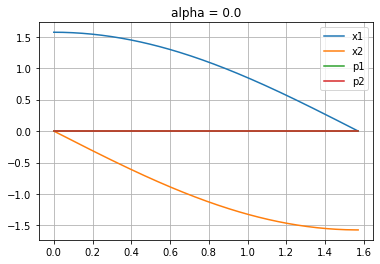

alpha = 0.1
error = 4.16392958717653e-11
x1(0) =  1.593396612
p2(0) =  -0.070951229
Value =  0.000913734


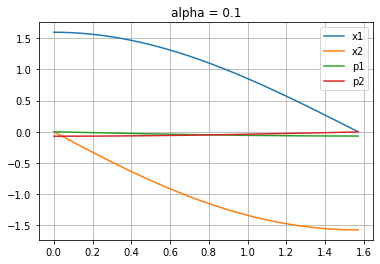

alpha = 1.5
error = 1.534598406500603e-10
x1(0) =  1.63484959
p2(0) =  -0.654098303
Value =  0.027808055


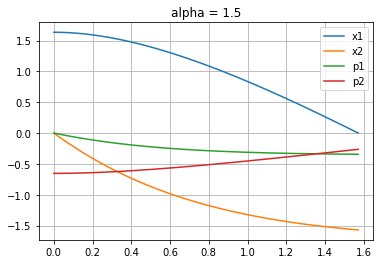

alpha = 10.0
error = 5.249881640098711e-10
x1(0) =  1.356765756
p2(0) =  -0.982358444
Value =  0.003396431


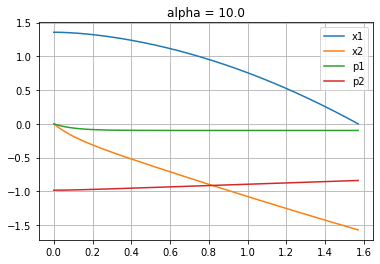

In [6]:
for alpha in [0.0, 0.1, 1.5, 10.0]:
    main(alpha, a1, a2, eps)